# Module 3 Assessment

Welcome to your Mod 3 Assessment. You will be tested for your understanding of concepts and ability to solve problems that have been covered in class and in the curriculum.

Use any libraries you want to solve the problems in the assessment.

_Read the instructions carefully_. You will be asked both to write code and respond to a few short answer questions.

**Note on the short answer questions**: For the short answer questions please use your own words. The expectation is that you have not copied and pasted from an external source, even if you consult another source to help craft your response. While the short answer questions are not necessarily being assessed on grammatical correctness or sentence structure, you should do your best to communicate yourself clearly.

The sections of the assessment are:
- Combinatorics, Probability and Discrete Distributions
- Statistical Distributions
- Statistical Tests
- Bayesian Statistics



In [1]:
# import the necessary libraries
import numpy as np
import pandas as pd 
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

## Part 1: Combinatorics, Probability & Discrete Distributions [Suggested time: 20 minutes]

### a. Set Theory

Given the following probabilities:

$P(A) = 0.7$

$P(B) = 0.5$

$P(B|A) = 0.4$

Calculate the following probabilities and assign to the variables `ans1` and `ans2`, respectively, in the next cell:

1.a.1) $P(A and B)$
1.a.2) $P(A|B)$

Hint: draw a diagram!


In [2]:
p_a = 0.7
p_b = 0.5
b_given_a = 0.4
# Finding the probability of A and B (P(A and B))
p_a_and_b = p_a * p_b

# Finding the probability of A given B (P(A|B))
p_a_given_b = (b_given_a * p_a) / (p_b)

ans1 = p_a_and_b  # 0.35
ans2 = p_a_given_b  # 0.56

### b. Card Combinatorics

A standard deck of playing cards consists of 52 cards in each of the four suits of spades, hearts, diamonds, and clubs. Each suit contains 13 cards: Ace, 2, 3, 4, 5, 6, 7, 8, 9, 10, Jack, Queen, and King.
    
You have a standard deck of 52 cards and are asked the following questions:

1.b.1) What is the probability of drawing a King or a Queen?

1.b.2) How many possible 5-card combinations can be formed with this deck of 52 cards?

Answer the questions below:

In [3]:
def factorial(n):
    if n == 0:
        return 1
    else:
        return n * factorial(n - 1)

ans1 = 8/52
ans2 = 2_598_960

### c. Discrete Probability Distributions

In a game with the same deck of 52 cards, you draw a card $n$ times with replacement. You win a point by drawing a face card (Jack, Queen, or King). 

The function `probability_of_scoring_k` is provided below. In this function, $k$ is the number of points won in the game, $n$ is the number of draws, and $p$ is the probability of winning a point. The function returns the corresponding probability of scoring $k$ points given $n$ and $p$.

In [4]:
def probability_of_scoring_k(n, p, k):
    """
    n = number of draws
    p = probability of winning a point
    k = number of points scored
    
    Use np.factorial()
    
    """
    
    # defining a helper function for factorial
    def fact(n):
        return np.math.factorial(n)
    
    return (fact(n)/(fact(k)*fact(n-k)))*(p**(k))*((1-p)**(n-k))

1.c.1) What is the probability $p$ of winning a point? 

In [5]:
# your code here 
face_cards = 12  # Number of face cards
cards = 52  # Number of cards
p = face_cards / cards  # Probability of a face card

p = face_cards / cards

1.c.2) Use the function `probability_of_scoring_k` to compute the probability of scoring 8 points out out of 22 draws.

In [6]:
# your code here 
ans1 = probability_of_scoring_k(22, p, 8)
print(ans1)

0.06532117736042573


1.c.3) Use the function `probability_of_scoring_k` to calculate the probability of drawing $k$ points out of 22 draws, for $k$ ranging from 0 to 22. 

_Hint: Your final result should be in the form of a list or array._

In [7]:
# your code here
prob_list = []
for k_values in range(23):
    prob = probability_of_scoring_k(22, p, k_values)
    prob_list.append(prob)
    
print(prob_list)

[0.003113481211226729, 0.020548975994096417, 0.06472927438140372, 0.12945854876280743, 0.18447843198700062, 0.1992367065459607, 0.16935120056406663, 0.1161265375296457, 0.06532117736042573, 0.03048321610153201, 0.011888454279597485, 0.0038907668551409957, 0.001069960885163774, 0.0002469140504224094, 4.761913829575039e-05, 7.619062127320063e-06, 1.0000019042107584e-06, 1.0588255456349209e-07, 8.823546213624342e-09, 5.57276602965748e-10, 2.5077447133458666e-11, 7.164984895273905e-13, 9.770433948100781e-15]


1.c.4) Plot your results to create the probability mass function. Use a bar plot. What type of distribution does the `probability_of_scoring_k` have?

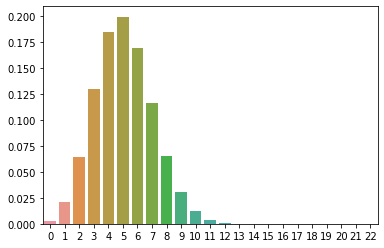

In [8]:
# your code here 
x = list(range(23))
sns.barplot(x, prob_list)

In [9]:
# your answer here 
# This is a normal distribution

## Part 2: Statistical Distributions [Suggested time: 25 minutes]

### a. Normal Distributions

Say we have check totals for all checks ever written at a TexMex restaurant. 

The distribution for this population of check totals happens to be normally distributed with a population mean of $\mu = 20$ and population standard deviation of $\sigma = 2$. 

2.a.1) Write a function to compute the z-scores for single checks of amount `check_amt`.

In [13]:
tex_mex = pickle.load(open("data/data10000.pkl", "rb"))

def z_score(check_amt):
    """
    check_amt = the amount for which we want to compute the z-score
    """
    mu = 20  # Population mean
    sigma = 2  # Standard Deviation
    
    z = (check_amt - mu) / sigma  # Calculating Z-score
    return z

0.12649110640673517

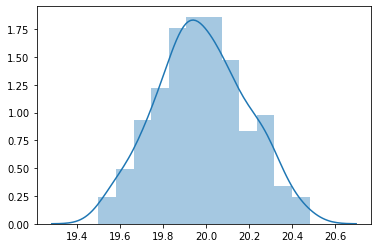

In [16]:
x = np.random.normal(loc=20, scale=2, size=100)  # Creating 100 random samples. loc is the population mean, scale is the standard deviation
sum(x < 15)
x_bar = x.mean()

# Creating a for loop to add 250 sample testing of the 100 samples we have
mean_list = []
for i in range(250):
    x = np.random.normal(loc=20, scale=2, size=100)
    x_bar = x.mean()
    mean_list.append(x_bar)

# Distribution graph to look at the means. Seeing how they are distributed
sns.distplot(mean_list)

# std
np.std(mean_list)

# standard diviation of the population
mu = 2

mu / np.sqrt(250)

2.a.2) I go to the TexMex restaurant and get a check for 24 dollars. 

Use your function to compute your check's z-score, and interpret the result using the empirical rule. 

In [15]:
# your code here 
z_score(24)  # Looking at the z-score(number of standard deviations away from the mean)
# 2 standard deviations away from the mean

2.0

In [123]:
# your answer here
# The z-score shows that your check amount is 2 standard deviations away from the population mean, 20. Because it is 2 standard deviations away it is in 13.5% quantile.

2.a.3) Using $\alpha = 0.05$, is my 25 dollar check significantly **greater** than the mean? How do you know this?  

Hint: Here's a link to a [z-table](https://www.math.arizona.edu/~rsims/ma464/standardnormaltable.pdf). 

In [93]:
# your code here
z_score(25)  # 2.5
area_under_curve = stats.norm.cdf(2.5)  # Finds the area under the curve
p_value = (1 - area_under_curve)  # Finding the p-value greater than the mean P(x>25)
p_value

0.006209665325776159

In [125]:
# your answer here 

# The z-score gives you standard deviation of 2.5.
# This then leads to a p-value of 0.006.
# This means that there is a 6/1,000 chance of someone having a check greater than or equal to 25

### b. Confidence Intervals and the Central Limit Theorem

2.b.1) Determine the 95% confidence interval around the mean check total for this population. Interpret your result. 

In [98]:
# your code here 
stats.norm.interval(alpha=0.05)

(-0.06270677794321385, 0.06270677794321385)

In [127]:
# your written answer here
# A Confidence Interval is when 95% of your data lies within, meaning that your data will occur said results 95% of the time, and 5%, which lies outside, will occur 5% of the time

2.b.2) Imagine that we didn't know how the population of check totals was distributed. How would **sampling** and the **Central Limit Theorem** allow us to **make inferences on the population mean**, i.e. estimate $\mu, \sigma$ of the population mean?

In [130]:
# Your written answer here
# Sampling allows you to collect a sample of your population and run various test to understand the population as a whole, we do this because we don't have enough resources to collect the entire population, so we instead collect a certain amount of sample size. 
# The Central limit theorem comes in when we take our sample and add on to it. It says that the bigger the sample size, the more likely your distribution will look like a normal distribution
# This means that the more samples we take in and record the mean of those samples, it will get closer to a normal distribution and get us closer to the true population mean.

## Part 3: Statistical Testing [Suggested time: 15 minutes]

The TexMex restaurant recently introduced Queso to its menu.

We have random samples of 1000 "No Queso" order check totals and 1000 "Queso" order check totals for orders made by different customers.

In the cell below, we load the sample data for you into the arrays `no_queso` and `queso` for the "no queso" and "queso" order check totals. Then, we create histograms of the distribution of the check amounts for the "no queso" and "queso" samples. 

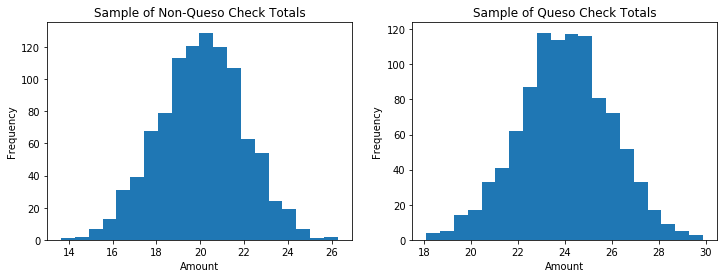

In [131]:
# Load the sample data 
no_queso = pickle.load(open("data/no_queso.pkl", "rb"))
queso = pickle.load(open("data/queso.pkl", "rb"))

# Plot histograms

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.set_title('Sample of Non-Queso Check Totals')
ax1.set_xlabel('Amount')
ax1.set_ylabel('Frequency')
ax1.hist(no_queso, bins=20)

ax2.set_title('Sample of Queso Check Totals')
ax2.set_xlabel('Amount')
ax2.set_ylabel('Frequency')
ax2.hist(queso, bins=20)
plt.show()

### a. Hypotheses and Errors

The restaurant owners want to know if customers who order Queso spend **more or less** than customers who do not order Queso.

3.a.1) Set up the null $H_{0}$ and alternative hypotheses $H_{A}$ for this test.

In [ ]:
# Your written answer here
# Ho: The customers who order queso spend the same amount of money than the customers who do not order queso
# Ha: The customers who order queso spend more money than the customers who do not order queso

3.a.2) What does it mean to make `Type I` and `Type II` errors in this specific context?

In [ ]:
# your answer here
# A Type 1 Error is when you reject the null hypothesis when the null hypothesis is actually true.
# A Type II Error is when you fail to reject the null hypothesis(accepting the alternative hypothesis), when the null hypothesis is false

### b. Sample Testing

3.b.1) Run a statistical test on the two samples. Use a significance level of $\alpha = 0.05$. You can assume the two samples have equal variance. Can you reject the null hypothesis? 

_Hint: Use `scipy.stats`._

In [145]:
# your code here 

# Comparing the means of our two sample sizes
x_bar1 = queso.mean()
x_bar2 = no_queso.mean()
# Two sample test
alpha = 0.05
ttest = stats.ttest_ind(queso, no_queso, equal_var=True)
ttest

Ttest_indResult(statistic=45.16857748646329, pvalue=1.29670967092511e-307)

In [ ]:
# your answer here

# The p-value is less than the alpha value, 0.05, so we reject the null hypothesis

## Part 4: Bayesian Statistics [Suggested time: 15 minutes]
### a. Bayes' Theorem

Thomas wants to get a new puppy 🐕 🐶 🐩 


<img src="https://media.giphy.com/media/rD8R00QOKwfxC/giphy.gif" />

He can choose to get his new puppy either from the pet store or the pound. The probability of him going to the pet store is $0.2$. 

He can choose to get either a big, medium or small puppy.

If he goes to the pet store, the probability of him getting a small puppy is $0.6$. The probability of him getting a medium puppy is $0.3$, and the probability of him getting a large puppy is $0.1$.

If he goes to the pound, the probability of him getting a small puppy is $0.1$. The probability of him getting a medium puppy is $0.35$, and the probability of him getting a large puppy is $0.55$.

4.a.1) What is the probability of Thomas getting a small puppy?
4.a.2) Given that he got a large puppy, what is the probability that Thomas went to the pet store?
4.a.3) Given that Thomas got a small puppy, is it more likely that he went to the pet store or to the pound?
4.a.4) For Part 2, what is the prior, posterior and likelihood?

In [144]:
ans1 = 1
ans2 = 1
ans3 = "The P(store | small puppy) = 1 "
ans4_prior = "answer here"
ans4_posterior = "answer here"
ans4_likelihood = "answer here"